In [2]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [5]:
data = pd.read_csv("fake_job_postings.csv")
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Exploratory Data Analysis

In [6]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.isnull ().sum ()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
df = data.drop('job_id', axis=1)
df = df.drop('salary_range', axis=1)
df.tail()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,Web Application Developers,"NZ, N, Wellington",Engineering,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [9]:
df['department'] = df['department'].fillna('Other')
df['location'] = df['location'].fillna('Unknown')
df['company_profile'] = df['company_profile'].fillna('No Company Profile')
df['description'] = df['description'].fillna('No Description')
df['requirements'] = df['requirements'].fillna('Unknown Requirements')
df['benefits'] = df['benefits'].fillna('No Listed Benefits')
df['employment_type'] = df['employment_type'].fillna('Unknown')
df['required_experience'] = df['required_experience'].fillna('Unknown')
df['required_education'] = df['required_education'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
df['function'] = df['function'].fillna('Unknown')

In [10]:
df.isna().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [11]:
experience = dict(df.required_experience.value_counts())
edu = dict(df.required_education.value_counts())

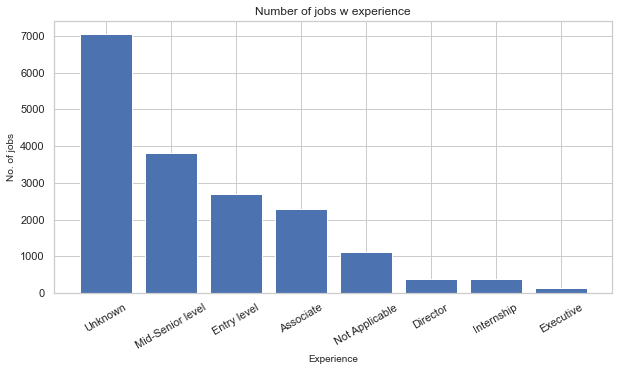

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (10,5))
sns.set_theme(style = 'whitegrid')
plt.bar(experience.keys(), experience.values())
plt.title("Number of jobs w experience")
plt.xlabel('Experience', size = 10)
plt.ylabel('No. of jobs', size = 10)
plt.xticks(rotation = 30)
plt.show()

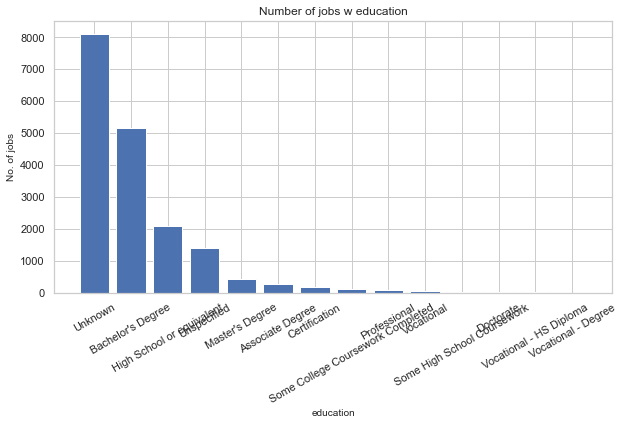

In [13]:
plt.figure(figsize= (10,5))
sns.set_theme(style = 'whitegrid')
plt.bar(edu.keys(), edu.values())
plt.title("Number of jobs w education")
plt.xlabel('education', size = 10)
plt.ylabel('No. of jobs', size = 10)
plt.xticks(rotation = 30)
plt.show()

## Word Cloud

In [14]:
#Combine all text columns for analysis
df2 = df
df2['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df2.head(1)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No Listed Benefits,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,"Marketing Intern We're Food52, and we've creat..."


In [15]:
fraud_text = df2[df2.fraudulent == 1].text
real_text = df2[df2.fraudulent == 0].text

In [16]:
df2 = df2.iloc[:, -2:]
df2.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


# Fake Job Word cloud

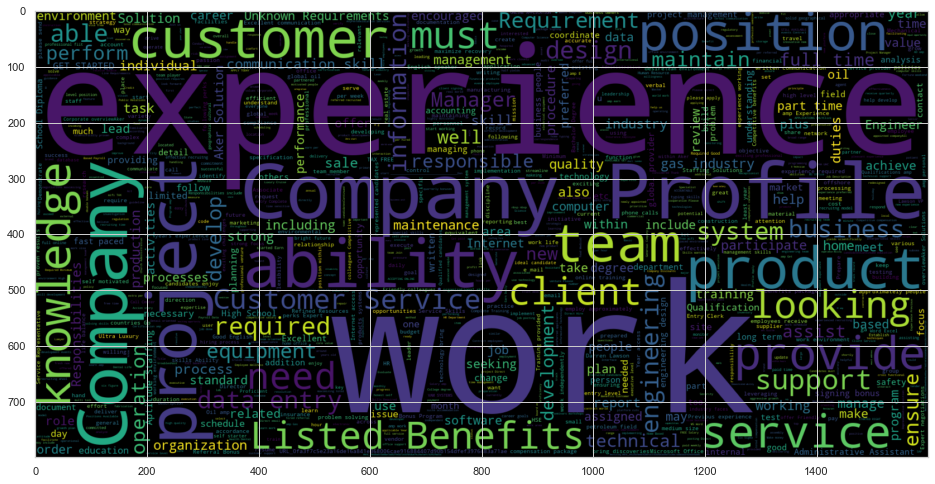

In [17]:
from nltk.corpus import stopwords
from wordcloud import WordCloud 
stop_words = set(stopwords.words('english'))
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = stop_words).generate(str(" ".join(fraud_text)))
plt.imshow(wc, interpolation = 'bilinear')

# Real Job Word Cloud

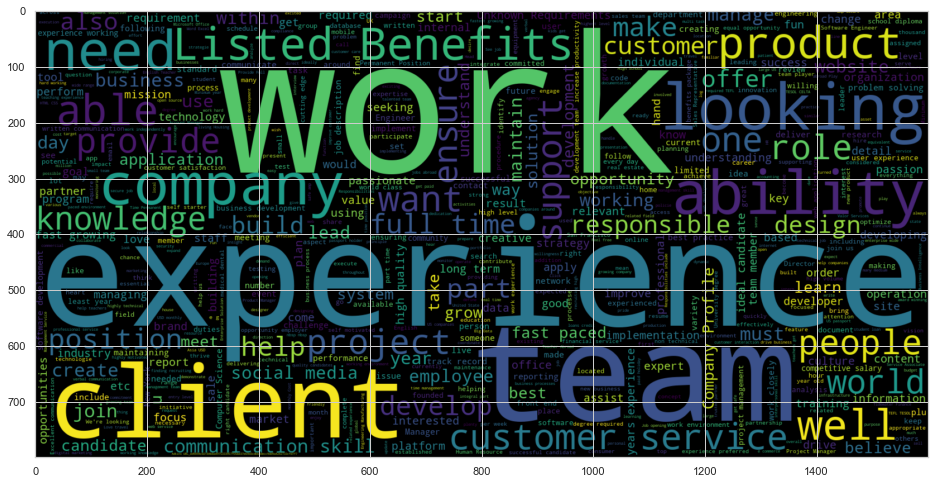

In [18]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = stop_words).generate(str(" ".join(real_text)))
plt.imshow(wc, interpolation = 'bilinear')

In [19]:
df2 = df2.iloc[:, -2:]
df2.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


## Clean string columns

In [20]:
import regex as re
import regex as re

df['description'] = df['description'].str.lower()
df['description'] = df['description'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))


In [21]:
#Tokenizing description series
import nltk 
from nltk.tokenize import word_tokenize

df['description_token'] = df['description'].apply(word_tokenize)
df.head(1)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text,description_token
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...",food52 a fastgrowing james beard awardwinning ...,Experience with content management systems a m...,No Listed Benefits,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,"Marketing Intern We're Food52, and we've creat...","[food52, a, fastgrowing, james, beard, awardwi..."


In [22]:
#remove stopwords from description
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['description_clean'] =  df['description_token'].apply(lambda x: [word for word in x if word not in stop_words])
df.head(1)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text,description_token,description_clean
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...",food52 a fastgrowing james beard awardwinning ...,Experience with content management systems a m...,No Listed Benefits,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,"Marketing Intern We're Food52, and we've creat...","[food52, a, fastgrowing, james, beard, awardwi...","[food52, fastgrowing, james, beard, awardwinni..."


In [23]:
#join string back for analysis

def combine_words(words_list):
    # Combine the words into a single string with spaces
    combined_string = " ".join(words_list)
    
    return combined_string


df["Total"] = df["description_clean"].apply(combine_words)

# Print the DataFrame
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text,description_token,description_clean,Total
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...",food52 a fastgrowing james beard awardwinning ...,Experience with content management systems a m...,No Listed Benefits,0,1,0,Other,Internship,Unknown,Unknown,Marketing,0,"Marketing Intern We're Food52, and we've creat...","[food52, a, fastgrowing, james, beard, awardwi...","[food52, fastgrowing, james, beard, awardwinni...",food52 fastgrowing james beard awardwinning on...
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",organised focused vibrant awesomedo you hav...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production 90 S...,"[organised, focused, vibrant, awesomedo, you, ...","[organised, focused, vibrant, awesomedo, passi...",organised focused vibrant awesomedo passion cu...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Other,Valor Services provides Workforce Solutions th...,our client located in houston is actively seek...,Implement pre-commissioning and commissioning ...,No Listed Benefits,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,0,Commissioning Machinery Assistant (CMA) Valor ...,"[our, client, located, in, houston, is, active...","[client, located, houston, actively, seeking, ...",client located houston actively seeking experi...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,the company esri environmental systems resear...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Our passion ...,"[the, company, esri, environmental, systems, r...","[company, esri, environmental, systems, resear...",company esri environmental systems research in...
4,Bill Review Manager,"US, FL, Fort Worth",Other,SpotSource Solutions LLC is a Global Human Cap...,job title itemization review managerlocation f...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager SpotSource Solutions LLC i...,"[job, title, itemization, review, managerlocat...","[job, title, itemization, review, managerlocat...",job title itemization review managerlocation f...


In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

transformer = TfidfTransformer(smooth_idf = False)
count_vectorizer = CountVectorizer(ngram_range = (1,2))

In [25]:
train_counts = count_vectorizer.fit_transform(df['Total'].values)

train_tfidf = transformer.fit_transform(train_counts)
train_counts


<17880x777343 sparse matrix of type '<class 'numpy.int64'>'
	with 3388569 stored elements in Compressed Sparse Row format>

In [26]:
X = train_tfidf
y = df['fraudulent']

## SMOTE Way 1:

In [27]:
from collections import Counter
Counter(y)

Counter({0: 17014, 1: 866})

In [28]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo,y_smo = smo.fit_resample(X,y) 

In [29]:
Counter(y_smo)

Counter({0: 17014, 1: 17014})

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo, test_size = 0.2, random_state = 3)

## Build the Decision Tree Model

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3), n_estimators = 5)
Adab.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=5)

In [32]:
print("score for training dataset:",Adab.score(X_train, y_train))
print("score for test dataset:",Adab.score(X_test, y_test))
print("predict:",Adab.predict(X_test))

score for training dataset: 0.8310924987142753
score for test dataset: 0.83191301792536
predict: [1 1 1 ... 1 1 0]


Ensemble

In [36]:
X_train1=X_train[y_train==0].iloc[0::3].append(X_train[y_train==1])
X_train2=X_train[y_train==0].iloc[1::3].append(X_train[y_train==1])
X_train3=X_train[y_train==0].iloc[2::3].append(X_train[y_train==1])

AttributeError: append not found